<a href="https://colab.research.google.com/github/SaraSaponaro/segmentation_program/blob/master/DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files 
uploaded = files.upload() 

Saving feature_ML.txt to feature_ML.txt


In [0]:
import pandas as pd
"""
read both txt files: one containing feature from our algorithm (mass) and feature from reference algorithm (mass_ref). 
"""
#mass = pd.read_table('feature_al_ML.txt', sep='\t', delim_whitespace=True, index_col=False, names=['filename ', 'classe', 'area'  ,'circularity', 'mu_NRL ' ,'std_NRL ', 'mu_VR','RLE ',' convexity ','std_I ' ,'kurtosis ','skewness'])
mass_ref = pd.read_table('feature_ML.txt', sep='\t', delim_whitespace=True, index_col=False, names=['filename', 'classe', 'area', 'circ' ,'mu_NRL', 'std_NRL', 'E', 'conv', 'istd', 'kurt', 'sk'])
#print(mass_ref)
#print(mass_ref.groupby('classe').size())


In [0]:
import seaborn as sns 
sns.pairplot(mass.loc[:,'classe':'skewness'], hue='classe')

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


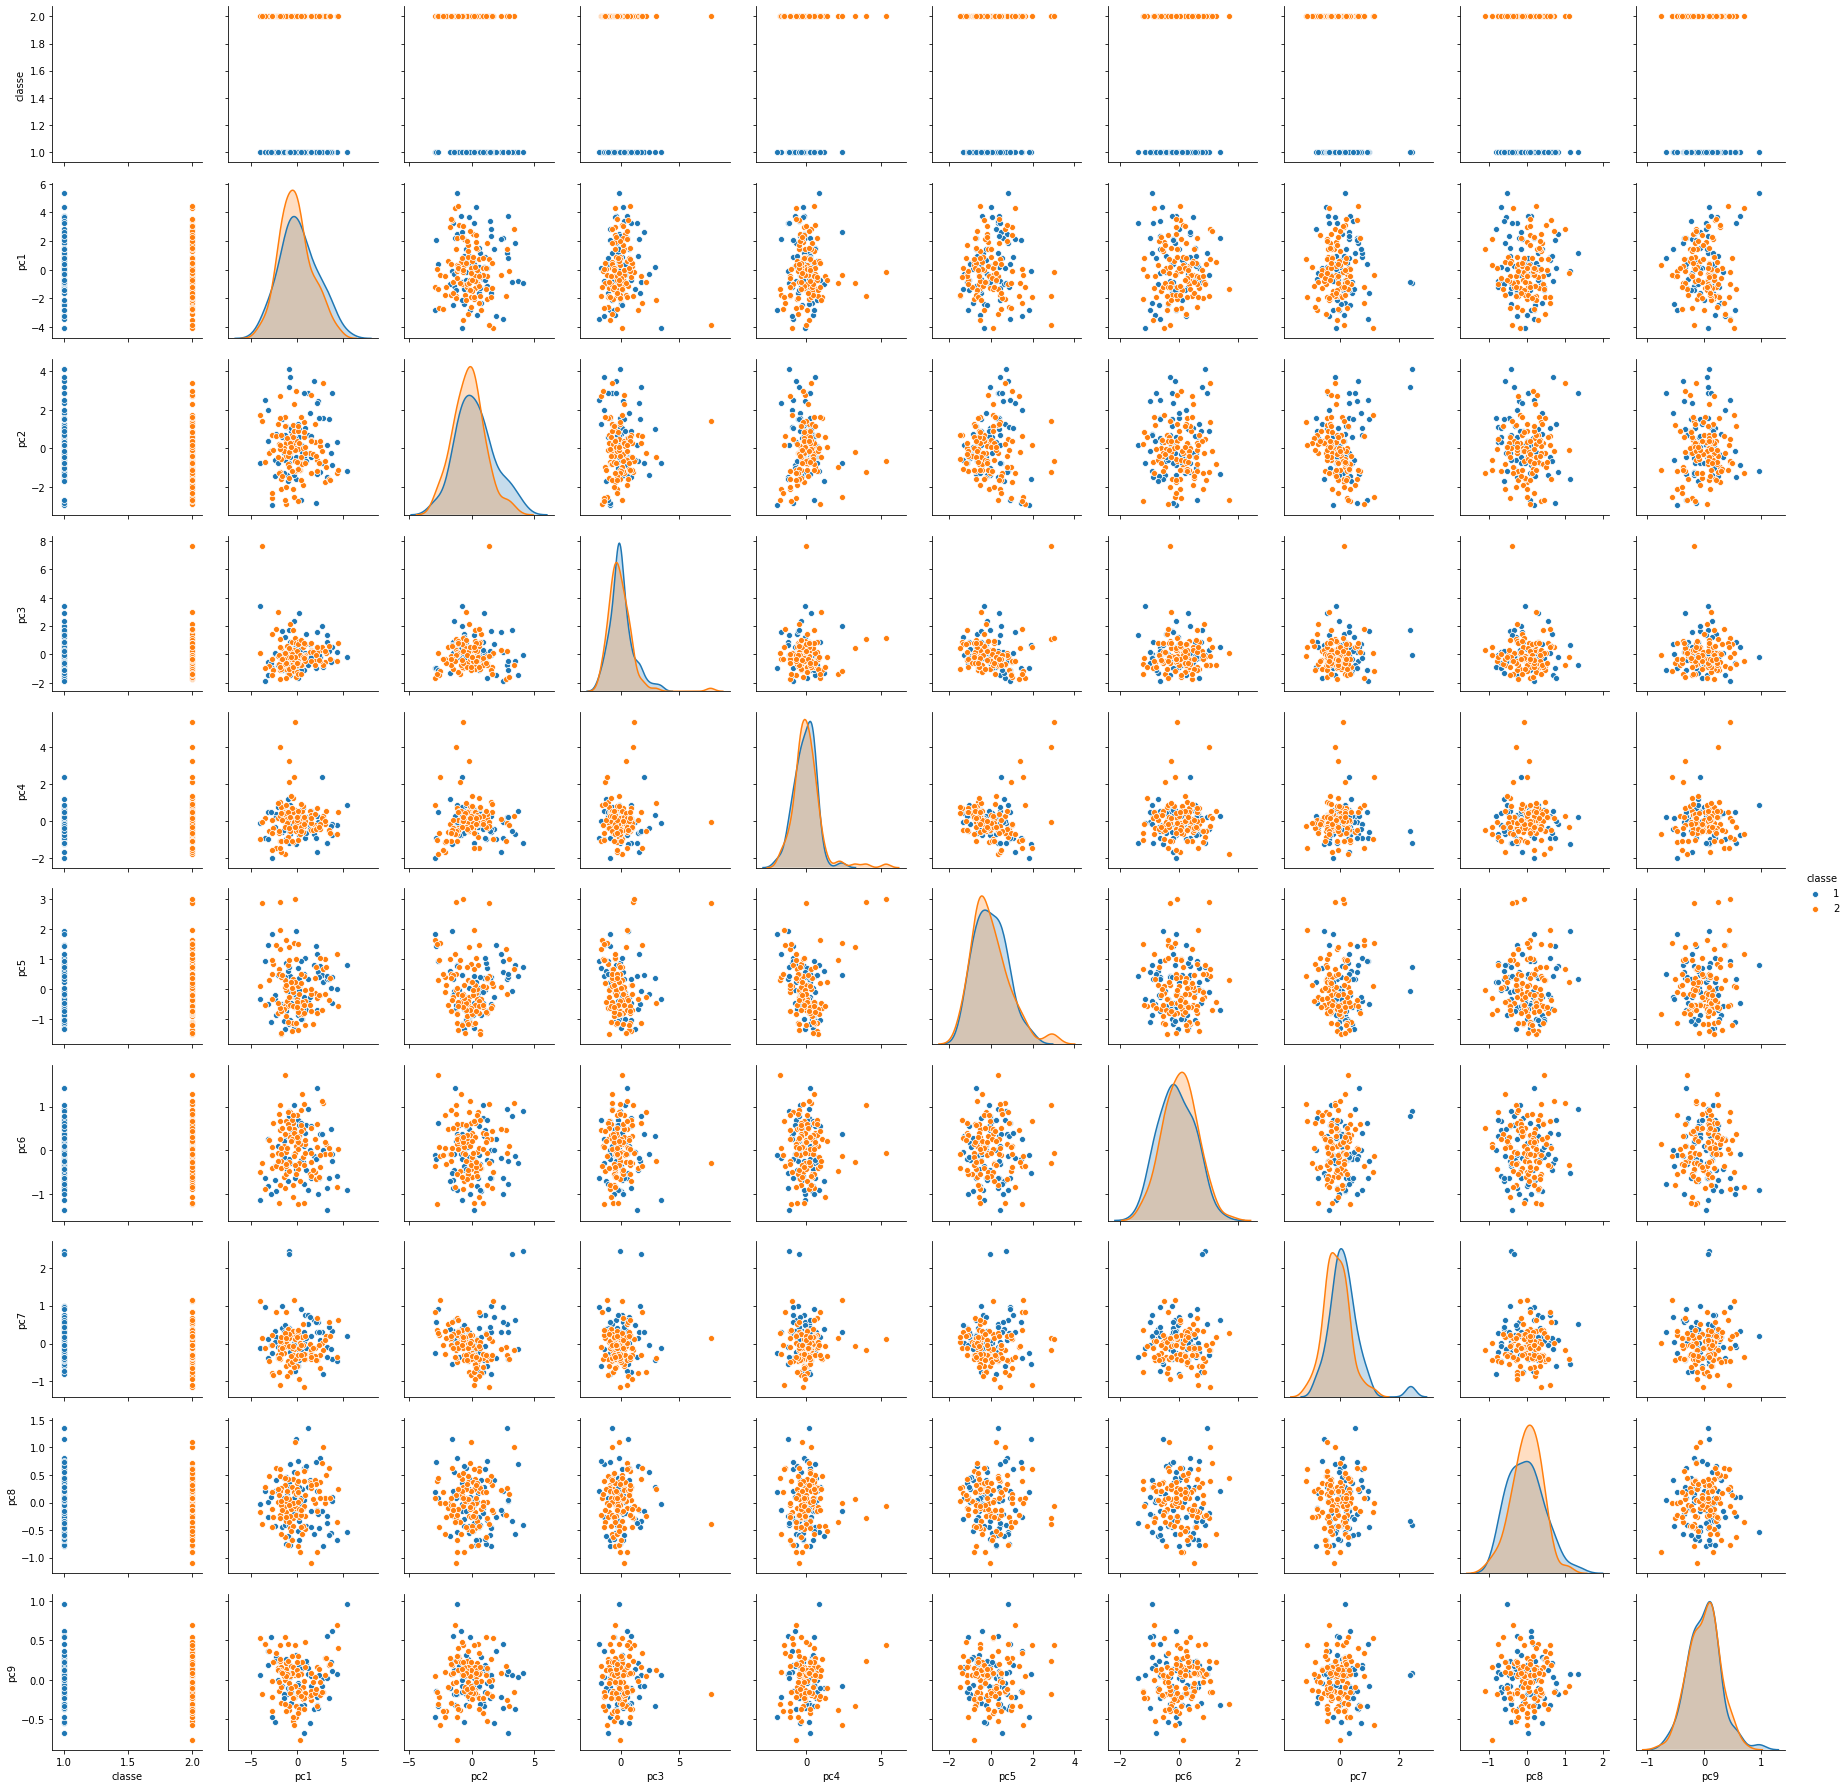

In [4]:
#PCA
import seaborn as sns 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

features = ['area', 'circ' ,'mu_NRL', 'std_NRL', 'E', 'conv', 'istd', 'kurt', 'sk']
#features = ['area'  ,'circularity', 'mu_NRL ' ,'std_NRL ', 'mu_VR','RLE ',' convexity ','std_I ' ,'kurtosis ','skewness']
# Separating out the features
x = mass_ref.loc[:, features].values
# Separating out the class
y = mass_ref.loc[:,['classe']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(x)

#principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10'])
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9'])

finalDf = pd.concat([mass_ref[['classe']],principalDf], axis = 1)

sns.pairplot(finalDf.loc[:,'classe':'pc9'], hue='classe')


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12)                120       
_________________________________________________________________
dropout_3 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 12)                156       
_________________________________________________________________
dropout_4 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 13        
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________








acc: 40.68%
Model: "sequential_3"
_________________________________________________________________
Layer (type)  

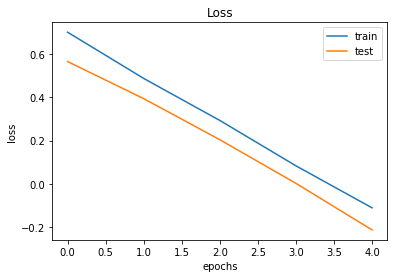

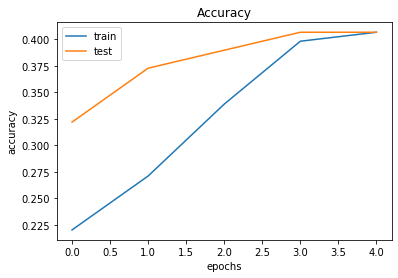

In [6]:
#inut ddn ::: using pca datas

from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import StratifiedKFold
import numpy
from matplotlib import pyplot

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
#dataset=finalDf.loc[:, 'classe':'pc10'].values
dataset=finalDf.loc[:, 'classe':'pc9'].values
X = dataset[:,1:]
Y = dataset[:,0]

# define n-fold cross validation test harness
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, Y):
    
    #create model
    model = Sequential()
    #model.add(Dense(12, input_dim=10, activation='relu'))
    model.add(Dense(12, input_dim=9, activation='relu'))
    model.add(Dropout(0.02))
    model.add(Dense(12, activation='relu'))
    model.add(Dropout(0.02))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history=model.fit(X[train], Y[train],validation_data=(X[test], Y[test]), epochs=5, batch_size=7, verbose=0)
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

'''
from keras.utils import plot_model 
plot_model(model)
'''
pyplot.figure(1)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.ylabel('loss')
pyplot.xlabel('epochs')
#pyplot.subplot(212)
pyplot.figure(2)
pyplot.title('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.ylabel('accuracy')
pyplot.xlabel('epochs')
pyplot.show()


In [0]:
# 2-fold cross validation
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import StratifiedKFold
import numpy
from matplotlib import pyplot
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt('feature_al_ML.txt', delimiter='\t', usecols=(1,2,3,4,5,6,7,8,9,10,11))
# split into input (X) and output (y) variables
X = dataset[:,1:]
Y = dataset[:,0]
# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, Y):
    
    #create model
    model = Sequential()
    model.add(Dense(12, input_dim=10, activation='relu'))
    model.add(Dropout(0.02))
    model.add(Dense(12, activation='relu'))
    model.add(Dropout(0.02))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history=model.fit(X[train], Y[train],validation_data=(X[test], Y[test]), epochs=6, batch_size=7, verbose=0)
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))


#aggiungi 
#from keras.utils import plot_model plot_model(model, to_file='model.png')
#pyplot.subplot(211)
pyplot.figure(1)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
#pyplot.subplot(212)
pyplot.figure(2)
pyplot.title('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

#history.history


0.49642857142857144
fpr [0.         0.         0.01388889 0.01388889 0.02777778 0.02777778
 0.05555556 0.05555556 0.06944444 0.06944444 0.08333333 0.08333333
 0.09722222 0.09722222 0.11111111 0.11111111 0.20833333 0.20833333
 0.22222222 0.22222222 0.23611111 0.23611111 0.25       0.25
 0.26388889 0.26388889 0.27777778 0.27777778 0.29166667 0.29166667
 0.30555556 0.30555556 0.31944444 0.31944444 0.33333333 0.33333333
 0.34722222 0.34722222 0.36111111 0.36111111 0.40277778 0.40277778
 0.41666667 0.41666667 0.44444444 0.44444444 0.48611111 0.48611111
 0.5        0.5        0.51388889 0.51388889 0.54166667 0.54166667
 0.55555556 0.55555556 0.56944444 0.56944444 0.59722222 0.59722222
 0.65277778 0.65277778 0.66666667 0.66666667 0.70833333 0.70833333
 0.72222222 0.72222222 0.75       0.75       0.76388889 0.76388889
 0.80555556 0.80555556 0.81944444 0.81944444 0.83333333 0.83333333
 0.84722222 0.84722222 0.875      0.875      0.90277778 0.90277778
 0.93055556 0.93055556 0.94444444 0.94444444

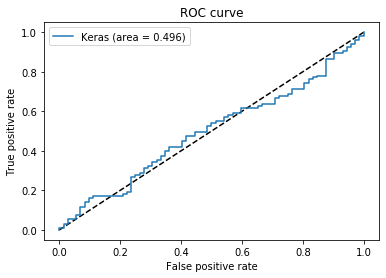

In [7]:
from sklearn.metrics import roc_curve, auc 
import pylab as plt 

y_pred_keras = model.predict(X).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y, y_pred_keras, pos_label=2)
auc_keras = auc(fpr_keras, tpr_keras)
print(auc_keras)
print('fpr',fpr_keras)
print('tpr',tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()



